<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the components of an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN/LSTM to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [1]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

C:\Users\soobt\Anaconda3\envs\jupyterlab\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\soobt\Anaconda3\envs\jupyterlab\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\soobt\Anaconda3\envs\jupyterlab\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


2113536/2110848 [==============================] - 0s 0us/step


In [2]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

557056/550378 [==============================] - 0s 0us/step
Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [32]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.optimizers import RMSprop

batch_size = 128
max_features = len(word_index.values())+1
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


print('Build model...')
optimizer = RMSprop(learning_rate=0.01)

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128))
model.add(Dense(max_features, activation='softmax'))

model.summary()

8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)
Build model...
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         3965440   
_________________________________________________________________
lstm_13 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_8 (Dense)              (None, 30980)             3996420   
Total params: 8,093,444
Trainable params: 8,093,444
Non-trainable params: 0
_________________________________________________________________


In [36]:
# You should only run this cell once your model has been properly configured

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [46]:
print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=1,
          validation_data=(X_test, y_test))

Train...
Train on 8982 samples, validate on 2246 samples
8982/8982 [==============================] - 13s 1ms/sample - loss: 0.3510 - accuracy: 0.9097 - val_loss: 1.1659 - val_accuracy: 0.7391


In [47]:
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size,
                            verbose = 0)
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 1.1658967766290462
Test accuracy: 0.7390917


## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

`pad_sequences` takes a list of sequences, and padds their length up to some maximum size. By default, it adds `0` to the begining of all the sequences until they are the desired length. The reason it's needed is the fixed size of our network's input. The network expects input vectors of a specific length, in our case 200, and it cannot except a vector of more or less length than that.

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

LSTMs are designed to remember longer-term information which a traditional RNN would quickly forget. This allows LSTMs to better model long-term patterns and contexts.

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

RNNs are, at their core, networks for sequence modeling and prediction. Examples of problems that involve this are time series prediction and text prediction/generation, both of which involve predicting a new sequence element based on past elements. Sequence classification, such as text-topic classification, is also well suited for an RNN, as it can incorporate structure-over-time in making its classification.
    

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [4]:
!pip install google_images_download

<img align="left" src="https://www.maxpixel.net/static/photo/1x/Nature-Bull-Frog-Pond-Green-Lily-Pad-Frog-2526024.jpg" width=400>

In [5]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "lilly frog pond", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = lilly frog pond
Evaluating...
Starting Download...
Image URL: https://img-aws.ehowcdn.com/350x235p/photos.demandstudios.com/getty/article/110/213/78036715_XS.jpg
Completed Image ====> 1.78036715_XS.jpg
Image URL: https://www.maxpixel.net/static/photo/1x/Nature-Bull-Frog-Pond-Green-Lily-Pad-Frog-2526024.jpg
Completed Image ====> 2.Nature-Bull-Frog-Pond-Green-Lily-Pad-Frog-2526024.jpg
Image URL: https://c8.alamy.com/comp/C63A50/green-frog-floating-on-a-water-lily-pad-in-a-pond-with-pink-flowers-C63A50.jpg
Completed Image ====> 3.green-frog-floating-on-a-water-lily-pad-in-a-pond-with-pink-flowers-C63A50.jpg
Image URL: https://cdn.pixabay.com/photo/2018/07/29/16/11/water-lilies-3570439_960_720.jpg
Completed Image ====> 4.water-lilies-3570439_960_720.jpg
Image URL: https://www.welcomewildlife.com/wp-content/uploads/2015/01/Frog-on-lily-pad.jpg
Completed Image ====> 5.Frog-on-lily-pad.jpg

Errors: 0



At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals* 
- Check for fish or other labels
- Create a matplotlib visualizations of the images and your prediction as the visualization label

In [1]:
# You've got something to do in this cell. ;)

import numpy as np

import re

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img_path):
  x = image.img_to_array(process_img_path(img_path))
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = ResNet50(weights='imagenet')
  features = model.predict(x)
  results = decode_predictions(features, top=3)[0]
  print(results)
  for entry in results:
    if re.search("frog", entry[1]):
      return entry[2]
  return 0.0

C:\Users\soobt\Anaconda3\envs\jupyterlab\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\soobt\Anaconda3\envs\jupyterlab\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\soobt\Anaconda3\envs\jupyterlab\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


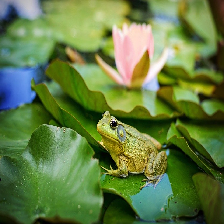

In [83]:
process_img_path(absolute_image_paths[0]['lilly frog pond'][1])

In [82]:
img_contains_frog( absolute_image_paths[0]['lilly frog pond'][1] )

[('n01644373', 'tree_frog', 0.9419557), ('n01644900', 'tailed_frog', 0.03629272), ('n01641577', 'bullfrog', 0.015699327)]


0.9419557

#### Stretch Goal: Displaying Predictions

In [19]:
import matplotlib.pyplot as plt

def img_visual(img_path):
  img = process_img_path(img_path)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = ResNet50(weights='imagenet')
  features = model.predict(x)
  results = decode_predictions(features, top=3)[0]
    
  objects = [entry[1] for entry in results]
  y_pos = np.arange(len(objects))
  performance = [entry[2] for entry in results]

  img = plt.imread(img_path)
  fig, ax = plt.subplots()

  ax.imshow(img, extent=[-.5, 2.5, 0, 1])

  plt.bar(y_pos, performance, align='center', alpha=0.9, color='cyan')
  plt.xticks(y_pos, objects)
  plt.ylabel("Prediction confidence")
  plt.xlabel("Predicted contents")
  plt.title(results[0][1] + "?")

  plt.show()


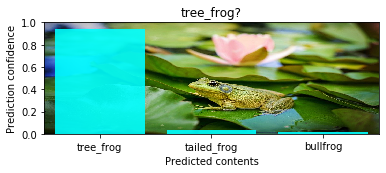

In [20]:
img_visual(absolute_image_paths[0]['lilly frog pond'][1])

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

Autoencoders are generally useful for dimensional reduction. By distilling a set of data to its basic components, other techniques can potentially be used to more efficiently analyze the data; finding clusters, doing classification, etc. It's quite a broadly useful technique. As a specific example, one could do image classification, not by classifying the images directly, but by classifying the encoded data, which could be quicker and more reliable as there's less noise and less raw data.

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?

Programming. Far more than any specifically data-science skill, I'm a fairly proficient programmer.

- What area of Data Science would you most like to learn more about, and why?

Several.  I'd like to learn more about algebraic/functional ML techniques (categories of learners, etc.) since it's a brilliant way to organize a historically esoteric subject. I'd like to learn more about bandit algorithms, as they're interesting and we didn't go over them. I'd like to learn more about applications to automated theorem proving, as formal mathematics is, on some level, my true passion.

- Where do you think Data Science will be in 5 years?

I doubt it will be much different than it is today. If I were optimistic, I'd say that auto-ML tequniques like archetecture search will be more mainstream, but, realistically, I wouldn't expect both substantial progress and addoption in only 5 years.

- What are the threats posed by AI to our society?

At its most powerful, AI is like a genie. If made well, but not wisely, it could give us anything we want, within possibility, to the letter of the request, but not the spirit. Without proper alignment with human goals, it would have no reason to stick to possibilities that maintain society.

- How do you think we can counteract those threats? 

Augment our own intellegence so that we don't need a separate entity to run certain parts of society.

- Do you think achieving General Artifical Intelligence is ever possible?

Yes. There's no reason to presume it's not. If humans can be considered generally intelligent, then we already create such things on a regular basis. In the future, it's not unreasonable to expect more flexibility in such creations.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [84]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")